In [1]:
# Importing all the libraries needed 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the dataset of Netflix in df
df=pd.read_csv(r"https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

In [3]:
# Displaying first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


The dataset lists the TV shows and movies released on Netflix, an American subscription streaming service.

1. The data gives details of cast, director, duration etc. and spans across different countries and years
2. The goal of this Exploratory Data Analysis is to identify patterns and generate insights that can help Netflix understand which type of shows/movies to produce and how to increase footprint globally

### 1. Observations

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


A quick scan of the data gives the following observations.

1. The data has 8807 rows and 12 columns with 11 object and 1 int datatype

2. Most of the columns have categorical data

3. Half of the columns have missing data

4. The column, date_added, is of the object data type and needs to be converted to date-time format

5. The duration is represented in different metrics

In [5]:
df["director"].head(10)

0                  Kirsten Johnson
1                              NaN
2                  Julien Leclercq
3                              NaN
4                              NaN
5                    Mike Flanagan
6    Robert Cullen, José Luis Ucha
7                     Haile Gerima
8                  Andy Devonshire
9                   Theodore Melfi
Name: director, dtype: object

#### Columns like director, cast, country and listed_in have nested values which need to be separated for effective analysis

In [6]:
# Checking for duplicate and nan values in title and show_id columns
print(df["title"].duplicated().sum())
print(df["show_id"].duplicated().sum())
print(df["title"].isna().sum())
print(df["show_id"].isna().sum())

0
0
0
0


#### The rows have unique show_id and title

In [7]:
# Find percentage of missing values
df.isna().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

#### director column has a high percentage of missing values followed by country and cast

In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


The statistical analysis of release_year reveals that there are movies/TV Shows released as early as 1925 and latest in 2021.

50% of content on Netflix was released before 2017 and the remaining 50% in the next 5 years

### 2. Univariate Analysis

In [9]:
df["type"].value_counts()/len(df["type"])*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

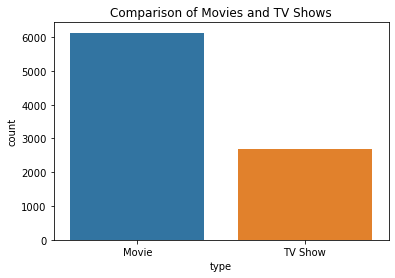

In [10]:
sns.countplot(data=df,x=df["type"])
plt.title("Comparison of Movies and TV Shows")
plt.show()

In [11]:
df["rating"].replace(to_replace=["74 min","84 min","66 min"],value=np.nan,inplace=True)

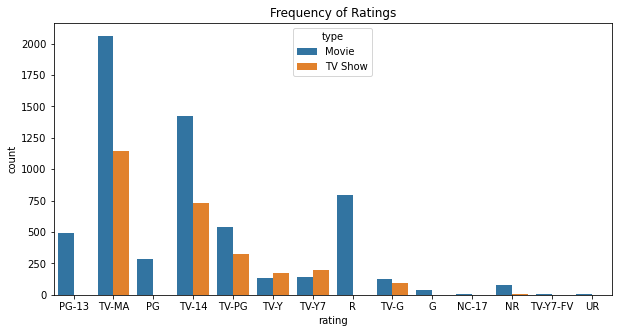

In [12]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(data=df,x=df["rating"],hue=df["type"])
plt.title("Frequency of Ratings")
plt.show()

1. Netflix has nearly 70% of its content as Movies and remaining 30% as TV shows
2. Majority of Netflix's Movies and TV shows are aimed at Mature Audience(TV-MA) followed by teenagers(TV-14)

In [13]:
# % of movies that were released before 2010
df[df["release_year"]<2010]["title"].count()/len(df["title"])*100

15.158396729873964

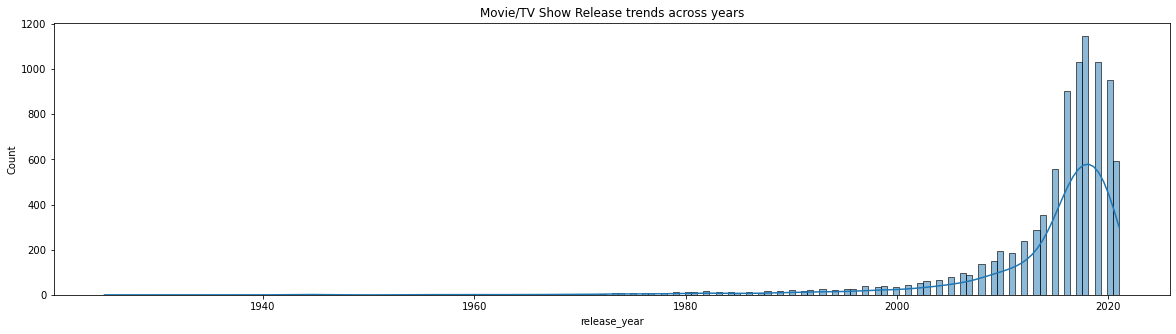

In [14]:
fig,ax=plt.subplots(figsize=(20,5))
sns.histplot(data=df,x=df["release_year"],kde=True)
plt.title("Movie/TV Show Release trends across years")
plt.show()

In [15]:
# Changing datatype of date_added column
df["date_added"]=pd.to_datetime(df["date_added"])

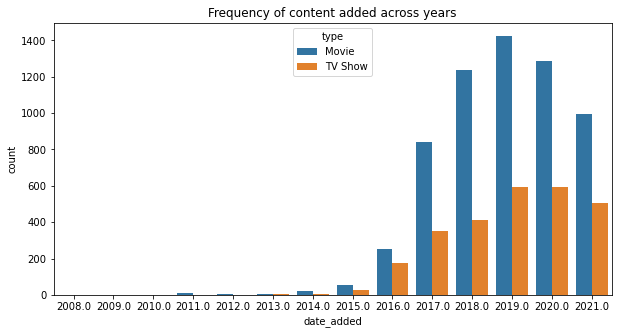

In [16]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(data=df,x=df["date_added"].dt.year,hue=df["type"])
plt.title("Frequency of content added across years")
plt.show()

1. Netflix focuses on latest movies and TV shows more, with movies released before 2010 only making 15% of the total
2. The maximum amount of content released was in 2018 and it saw a sharp decline post that.
3. The content added on Netflix also sees a downward trend after 2019 with a steeper slope for movies than TV shows

### 3. Data Preprocessing

#### 3.1 Duration Column

In [17]:
# Splitting the duration into 2 columns to separate out minutes and seasons
value=df["duration"].apply(lambda x: str(x).split()).tolist()
# Creating a new dataframe with value and reset index
df_new=pd.DataFrame(value,index=df["title"],columns=["duration","duration_metric"])
df_new.reset_index(inplace=True)

# Drop duration column from df and merge it with new dataframe
df.drop(columns=["duration"],inplace=True)
df=df.merge(df_new,on="title")

In [18]:
# Finding values of duration metric
df["duration_metric"].value_counts()

min        6128
Season     1793
Seasons     883
Name: duration_metric, dtype: int64

In [19]:
# Replacing Seasons with Season for effective analysis
df["duration_metric"].replace(to_replace="Seasons", value="Season",inplace=True)
df["duration_metric"].value_counts()

min       6128
Season    2676
Name: duration_metric, dtype: int64

In [20]:
# Converting duration to float datatype
df["duration"].replace(to_replace="nan", value=np.nan,inplace=True)
df["duration"]=df["duration"].astype("float32")

#### 3.2 Removing Nested values

In [21]:
# Splitting the values in cast column in the variable value1 
value1=df['cast'].apply(lambda x: str(x).split(', ')).tolist() 
# Updating the title column as index and converting it to a DataFrame
df_new=pd.DataFrame(value1,index=df['title']) 

# Melting the columns
df_new=df_new.melt(ignore_index=False,value_name="cast")
# Drop the variable column, reset index and drop None values
df_new.drop(columns=["variable"],inplace=True)
df_new=df_new.reset_index()
df_new=df_new.replace(to_replace="None", value=np.nan).dropna()

# Dropping the cast column from original DataFrame
df.drop(columns=["cast"],inplace=True)

# Merging new cast column with df
df=df.merge(df_new,on="title")

In [22]:
# Removing nested values for director column
value1=df["director"].apply(lambda x:str(x).split(", ")).tolist()
df_new=pd.DataFrame(value1,index=df["title"])

# Melting the columns
df_new=df_new.melt(ignore_index=False,value_name="director")

# Drop variable column
df_new.drop(columns=["variable"],inplace=True)

# Reset index, drop None values and drop duplicates
df_new.reset_index(inplace=True)
df_new=df_new.replace(to_replace="None",value=np.nan).dropna()
df_new.drop_duplicates(inplace=True)

# Drop director column from df and merge with new dataframe
df.drop(columns=["director"],inplace=True)
df=df.merge(df_new,on="title")

In [23]:
# Removing nested values for listed_in column
value1=df["listed_in"].apply(lambda x:str(x).split(", ")).tolist()
df_new=pd.DataFrame(value1,index=df["title"])

# Stacking all the column values and creating a dataframe
df_new=df_new.stack()
df_new=pd.DataFrame(df_new)

# Reset index 
df_new.reset_index(inplace=True)

# Drop level_1 column and update column names 
df_new.drop(columns=["level_1"],inplace=True)
df_new.columns=["title","listed_in"]

# Drop duplicate values
df_new.drop_duplicates(inplace=True)

# Drop listed_in column and merge with new df
df.drop(columns=["listed_in"],inplace=True)
df=df.merge(df_new,on="title")

In [24]:
# Removing nested values for country column
value1=df["country"].apply(lambda x:str(x).split(", ")).tolist()
df_new=pd.DataFrame(value1,index=df["title"])

# Stacking all the column values and creating a dataframe
df_new=df_new.stack()
df_new=pd.DataFrame(df_new)

# Reset index 
df_new.reset_index(inplace=True)

# Drop level_1 column and update column names 
df_new.drop(columns=["level_1"],inplace=True)
df_new.columns=["title","country"]

# Drop duplicate values
df_new.drop_duplicates(inplace=True)

# Drop country column in df and merge with new df
df.drop(columns=["country"],inplace=True)
df=df.merge(df_new,on="title")
df.head()

,show_id,type,title,date_added,release_year,rating,description,duration,duration_metric,cast,director,listed_in,country
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",90.0,min,nan,Kirsten Johnson,Documentaries,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2.0,Season,Ama Qamata,nan,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2.0,Season,Ama Qamata,nan,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2.0,Season,Ama Qamata,nan,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",2.0,Season,Khosi Ngema,nan,International TV Shows,South Africa


#### 3.3 Fill missing values

In [25]:
# Replace "nan" with np.nan
df.replace(to_replace="nan",value=np.nan,inplace=True)

In [26]:
# Find % of missing values
df.isna().sum()/len(df)*100

show_id             0.000000
type                0.000000
title               0.000000
date_added          0.078240
release_year        0.000000
rating              0.034663
description         0.000000
duration            0.001486
duration_metric     0.001486
cast                1.062676
director           25.077869
listed_in           0.000000
country             5.891266
dtype: float64

In [27]:
# Imputing missing values in duration with mean after grouping by dependant column(type)
df["duration"]=df.groupby("type")["duration"].apply(lambda x : x.fillna(x.mean()))

In [28]:
# Imputing missing values in date_added with mode
df["duration"].fillna(df["duration"].mode(),inplace=True)

In [29]:
# Imputing missing values of country with mode
df["country"]=df.groupby("type")["country"].apply(lambda x : x.fillna(x.mode().iloc[0]))


In [30]:
# Replacing missing values in remaining columns with Not Known
df.fillna("Not Known",inplace=True)

In [31]:
a=df.groupby("country")["title"].nunique().sort_values(ascending=False)
a=a[:10]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


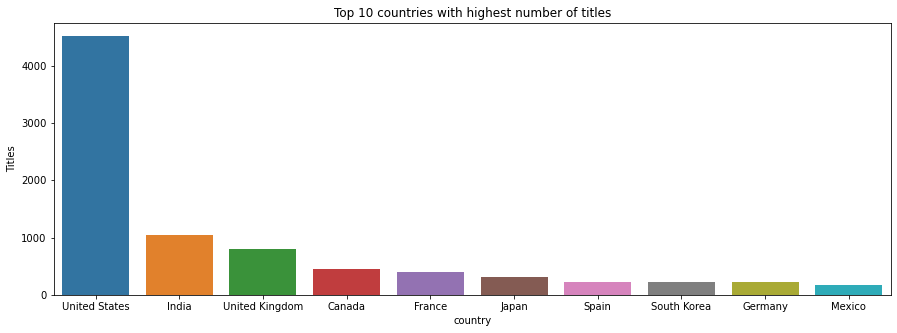

In [32]:
fig,ax=plt.subplots(figsize=(15,5))
sns.barplot(a.index,a.values)
plt.title("Top 10 countries with highest number of titles")
plt.ylabel("Titles")
plt.show()

United States has the highest amount of content created followed by India and United Kingdom

### 4. Bivariate Analysis

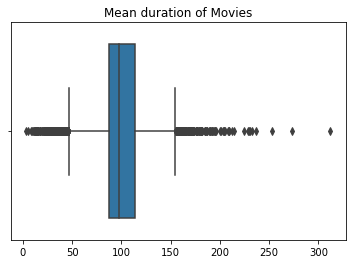

In [33]:
a=df[df["type"]=="Movie"].groupby("title")["duration"].mean()
sns.boxplot(x=a.values)
plt.title("Mean duration of Movies")
plt.show()

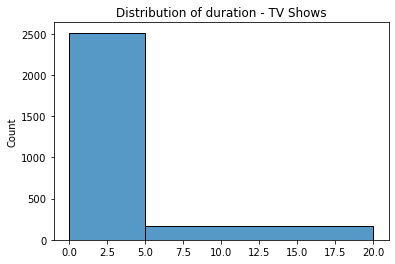

In [34]:
b=df[df["type"]=="TV Show"].groupby("title")["duration"].mean()
sns.histplot(b.values,bins=[0,5,20])
plt.title("Distribution of duration - TV Shows")
plt.show()

1. The mean duration of movies in Netflix is approximately 90 minutes
2. Most TV shows have less than 5 Seasons and a very small proportion has between 5 and 20 Seasons

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


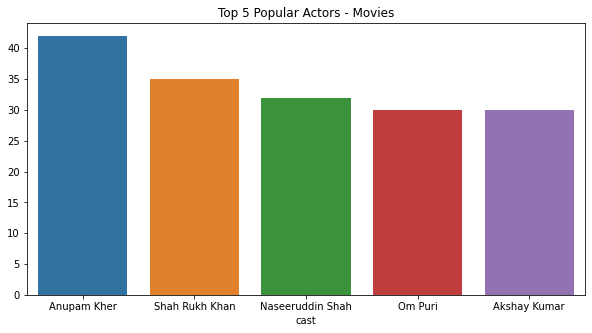

In [35]:
a=df[df["type"]=="Movie"].groupby("cast")["title"].nunique().sort_values(ascending=False)
a=a[1:6]
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(a.index,a.values)
plt.title("Top 5 Popular Actors - Movies")
plt.show()

In [36]:
df[df["type"]=="Movie"].groupby("cast").agg({"title":"nunique","country": pd.Series.mode}).sort_values(by="title",ascending=False)

,title,country
cast,,
Not Known,475,United States
Anupam Kher,42,India
Shah Rukh Khan,35,India
Naseeruddin Shah,32,India
Om Puri,30,India
...,...,...
Jacob Blair,1,"[Canada, United States]"
Jacob Bertrand,1,"[Canada, United States]"
Jacob Batalon,1,United States


Anupam Kher, Shahrukh Khan and Naseeruddin Shah are the popular movie actors with respect to the number of titles. The top 5 names are from India

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


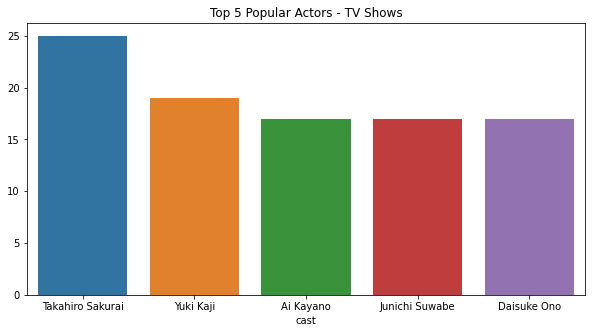

In [37]:
a=df[df["type"]=="TV Show"].groupby("cast")["title"].nunique().sort_values(ascending=False)
a=a[1:6]
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(a.index,a.values)
plt.title("Top 5 Popular Actors - TV Shows")
plt.show()

In [38]:
df[df["type"]=="TV Show"].groupby("cast").agg({"title":"nunique","country": pd.Series.mode}).sort_values(by="title",ascending=False)

,title,country
cast,,
Not Known,350,United States
Takahiro Sakurai,25,Japan
Yuki Kaji,19,Japan
Ai Kayano,17,Japan
Junichi Suwabe,17,Japan
...,...,...
Ivy Yin,1,Taiwan
Iván Pellicer,1,Spain
Iván Álvarez de Araya,1,Chile


Takahiro Sakurai, Yuki Kaji and Ai Kayano are the popular TV Show actors with respect to the number of titles. The top 5 names are from Japan

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


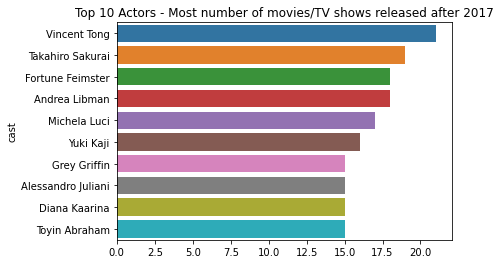

In [39]:
a=df[df["release_year"]>=2017].groupby("cast")["title"].nunique().sort_values(ascending=False)
a=a[1:11]
sns.barplot(a.values,a.index)
plt.title("Top 10 Actors - Most number of movies/TV shows released after 2017")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


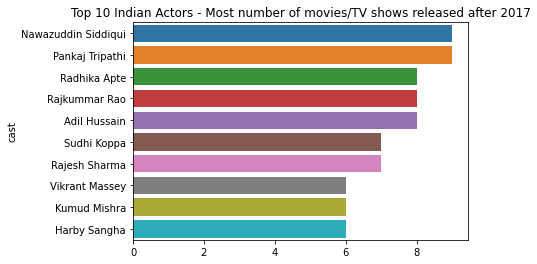

In [40]:
a=df[(df["release_year"]>=2017) & (df["country"]=="India")].groupby("cast")["title"].nunique().sort_values(ascending=False)
a=a[1:11]
sns.barplot(a.values,a.index)
plt.title("Top 10 Indian Actors - Most number of movies/TV shows released after 2017")
plt.show()

Vincent Tong is the most popular actor with most number of releases in the last 5 years. In India, Nawazuddin Siddiqui holds the top spot for the same.

In [42]:
a=df[(df["type"]=="Movie") & (df["country"]=="India")].groupby(["cast","director"])["title"].nunique().sort_values(ascending=False)
a

cast          director                 
Anupam Kher   David Dhawan                 6
Salman Khan   Sooraj R. Barjatya           5
Alok Nath     Sooraj R. Barjatya           5
Rajpal Yadav  Priyadarshan                 4
Ajay Devgn    Prakash Jha                  4
                                          ..
Johny Lever   Rahul Rawail                 1
              Neeraj Vora                  1
              Mastan Alibhai Burmawalla    1
              Khalid Mohamed               1
Şafak Sezer   Sermiyan Midyat              1
Name: title, Length: 7470, dtype: int64

Anupam Kher and David Dhawan is the hit actor-director pair with 6 titles between them.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


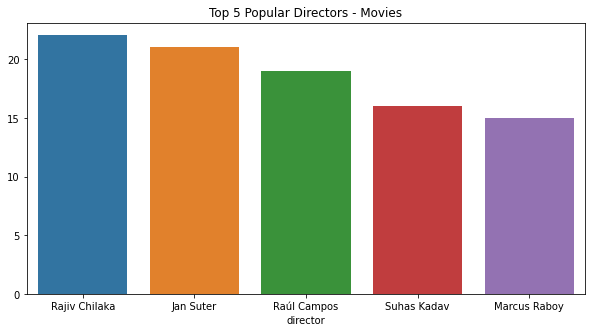

In [43]:
a=df[df["type"]=="Movie"].groupby("director")["title"].nunique().sort_values(ascending=False)
a=a[1:6]
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(a.index,a.values)
plt.title("Top 5 Popular Directors - Movies")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


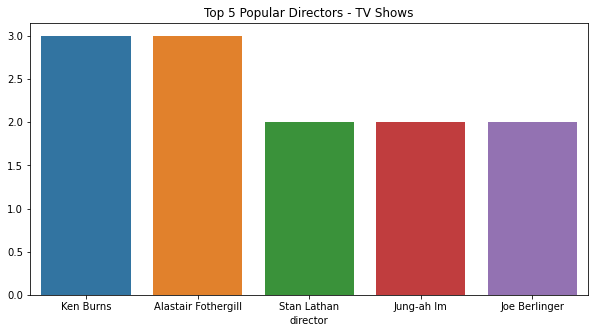

In [44]:
a=df[df["type"]=="TV Show"].groupby("director")["title"].nunique().sort_values(ascending=False)
a=a[1:6]
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(a.index,a.values)
plt.title("Top 5 Popular Directors - TV Shows")
plt.show()

Rajiv Chilaka is the most popular Movie Director and Ken Burns and Alastair Fothergill share the spot in TV Shows

In [45]:
a=df[(df["type"]=="TV Show")].groupby("director").agg({"duration" : "max"}).sort_values(by="duration",ascending=False)
a

,duration
director,
Not Known,17.0
Phil Sgriccia,15.0
Hayato Date,9.0
Philippa Lowthorpe,9.0
Andy Devonshire,9.0
...,...
Javier Gómez Santander,1.0
Jay Oliva,1.0
Jenner Furst,1.0


In [46]:
df[df["director"]=="Phil Sgriccia"].iloc[:2]

,show_id,type,title,date_added,release_year,rating,description,duration,duration_metric,cast,director,listed_in,country
57639,s2424,TV Show,Supernatural,2020-06-05 00:00:00,2019,TV-14,"Siblings Dean and Sam crisscross the country, ...",15.0,Season,Jared Padalecki,Phil Sgriccia,Classic & Cult TV,United States
57640,s2424,TV Show,Supernatural,2020-06-05 00:00:00,2019,TV-14,"Siblings Dean and Sam crisscross the country, ...",15.0,Season,Jared Padalecki,Phil Sgriccia,Classic & Cult TV,Canada


The TV Show that was renewed for the maximum number of Seasons is Supernatural directed by Phil Sgriccia and it ran for a whopping 15 seasons

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


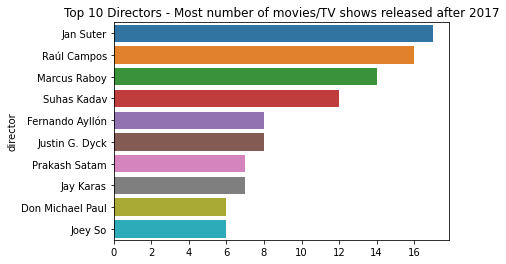

In [47]:
a=df[df["release_year"]>=2017].groupby("director")["title"].nunique().sort_values(ascending=False)
a=a[1:11]
sns.barplot(a.values,a.index)
plt.title("Top 10 Directors - Most number of movies/TV shows released after 2017")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


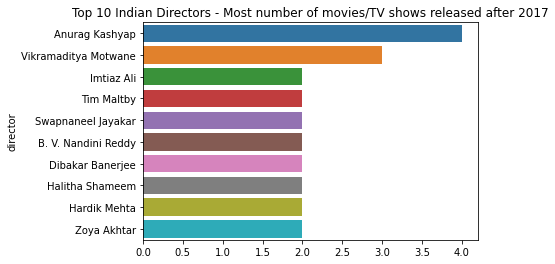

In [48]:
a=df[(df["release_year"]>=2017) & (df["country"]=="India")].groupby("director")["title"].nunique().sort_values(ascending=False)
a=a[1:11]
sns.barplot(a.values,a.index)
plt.title("Top 10 Indian Directors - Most number of movies/TV shows released after 2017")
plt.show()

Jan Suter is the most popular director with most number of releases in the last 5 years. In India, Anurag Kashyap holds the top spot for the same.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


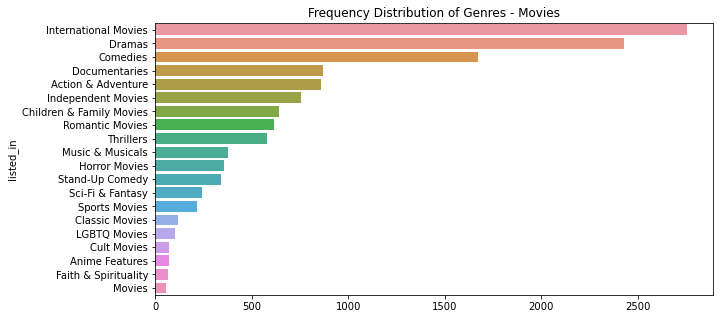

In [49]:
a=df[df["type"]=="Movie"].groupby("listed_in")["title"].nunique().sort_values(ascending=False)
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(a.values,a.index)
plt.title("Frequency Distribution of Genres - Movies")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


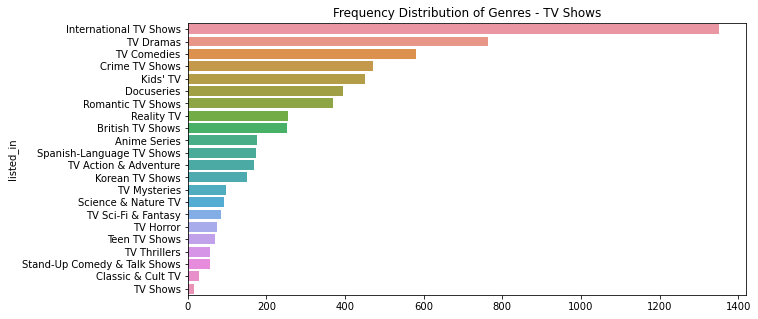

In [50]:
a=df[df["type"]=="TV Show"].groupby("listed_in")["title"].nunique().sort_values(ascending=False)
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(a.values,a.index)
plt.title("Frequency Distribution of Genres - TV Shows")
plt.show()

International Shows, Dramas and Comedies are the most added categories on Netflix in both Movies and TV Shows

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


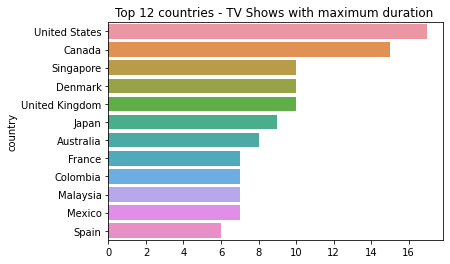

In [51]:
a=df[df["type"]=="TV Show"].groupby("country")["duration"].max().sort_values(ascending=False).head(20)
a = a[:12]
sns.barplot(a.values,a.index)
plt.title("Top 12 countries - TV Shows with maximum duration ")
plt.show()

In [52]:
a=df[df["country"]=="United States"].groupby("rating")["title"].nunique().sort_values(ascending=False)
a

rating
TV-MA        1376
TV-14         727
R             671
PG-13         441
TV-PG         394
PG            249
TV-Y7         245
TV-Y          207
TV-G          119
NR             43
G              39
Not Known       4
TV-Y7-FV        3
NC-17           1
UR              1
Name: title, dtype: int64

In [53]:
a=df[df["country"]=="India"].groupby("rating")["title"].nunique().sort_values(ascending=False)
a

rating
TV-14       572
TV-MA       266
TV-PG       144
TV-Y7        17
PG-13        11
TV-G         10
NR            7
PG            7
TV-Y          6
R             5
TV-Y7-FV      1
Name: title, dtype: int64

In [54]:
a=df[df["country"]=="Japan"].groupby("rating")["title"].nunique().sort_values(ascending=False)
a

rating
TV-MA        101
TV-14         99
TV-PG         50
TV-Y7         32
PG            11
PG-13          9
R              9
TV-Y           3
TV-G           2
G              1
Not Known      1
Name: title, dtype: int64

In [55]:
a=df[df["country"]=="Singapore"].groupby("rating")["title"].nunique().sort_values(ascending=False)
a

rating
TV-14    19
TV-MA    12
R         4
TV-PG     3
TV-Y      2
TV-Y7     1
Name: title, dtype: int64

In [56]:
a=df[df["country"]=="Denmark"].groupby("rating")["title"].nunique().sort_values(ascending=False)
a

rating
TV-MA       23
R            5
TV-14        4
PG-13        3
TV-G         3
TV-PG        3
NR           2
TV-Y         2
TV-Y7        2
TV-Y7-FV     1
Name: title, dtype: int64

In [57]:
a=df[df["country"]=="United Kingdom"].groupby("rating")["title"].nunique().sort_values(ascending=False)
a

rating
TV-MA    251
R        145
TV-14    103
TV-PG     98
PG-13     84
PG        35
TV-Y      34
TV-G      25
NR        12
TV-Y7     12
G          4
UR         1
Name: title, dtype: int64

1. Apart from US and Canada, there are countries like Singapore, Denmark, UK, Japan etc. that had very popular TV shows which ran for more than 9 Seasons.
2. TV-MA is the most popular rating across these countries except for Singapore where TV-14 is the popular rating.

In [58]:
a=df.groupby(["country","listed_in"])["title"].nunique().sort_values(ascending=False)["Japan"]
a

listed_in
International TV Shows          151
Anime Series                    143
International Movies             72
Anime Features                   61
Action & Adventure               57
Kids' TV                         29
Dramas                           23
Romantic TV Shows                21
TV Dramas                        21
Children & Family Movies         19
Crime TV Shows                   16
Teen TV Shows                    14
TV Comedies                      10
Comedies                          9
Reality TV                        9
Sci-Fi & Fantasy                  9
Independent Movies                7
Documentaries                     7
Romantic Movies                   7
Music & Musicals                  6
TV Thrillers                      6
TV Action & Adventure             5
TV Horror                         5
Thrillers                         5
Horror Movies                     4
TV Mysteries                      4
Classic Movies                    3
Docuseries        

In [59]:
a=df.groupby(["country","listed_in"])["title"].nunique().sort_values(ascending=False)["Singapore"]
a

listed_in
International TV Shows    19
TV Dramas                 15
International Movies      14
Dramas                     7
Crime TV Shows             5
Action & Adventure         5
Romantic TV Shows          5
Kids' TV                   3
Thrillers                  3
Horror Movies              3
TV Comedies                2
TV Horror                  2
Reality TV                 2
Korean TV Shows            1
TV Sci-Fi & Fantasy        1
Sci-Fi & Fantasy           1
Romantic Movies            1
Stand-Up Comedy            1
Independent Movies         1
Documentaries              1
Anime Series               1
Cult Movies                1
Name: title, dtype: int64

In [60]:
a=df.groupby(["country","listed_in"])["title"].nunique().sort_values(ascending=False)["Denmark"]
a

listed_in
International Movies        23
Dramas                      16
Documentaries               11
International TV Shows      10
Independent Movies           9
TV Dramas                    8
Thrillers                    5
Kids' TV                     4
Children & Family Movies     3
TV Comedies                  3
Action & Adventure           3
TV Mysteries                 2
Crime TV Shows               2
Romantic Movies              2
Sports Movies                2
Comedies                     1
Cult Movies                  1
Docuseries                   1
TV Action & Adventure        1
TV Thrillers                 1
Name: title, dtype: int64

In [61]:
a=df.groupby(["country","listed_in"])["title"].nunique().sort_values(ascending=False)["United Kingdom"]
a

listed_in
British TV Shows                225
Dramas                          196
International Movies            168
International TV Shows          128
Documentaries                   127
Comedies                         91
Docuseries                       89
Action & Adventure               84
Independent Movies               74
Thrillers                        61
Crime TV Shows                   48
Children & Family Movies         46
TV Comedies                      44
Kids' TV                         43
Romantic Movies                  38
Music & Musicals                 36
TV Dramas                        36
Sci-Fi & Fantasy                 35
Reality TV                       35
Horror Movies                    28
Science & Nature TV              27
Stand-Up Comedy                  21
Sports Movies                    21
Classic Movies                   16
Romantic TV Shows                11
TV Action & Adventure             9
LGBTQ Movies                      7
Classic & Cult TV 